In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [2]:
data_dir = 'D:\\birds'
print('Folders :', os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(len(classes))
print('10 classes :', classes)

Folders : ['train', 'valid']
10
10 classes : ['ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA']


In [3]:
dataset = ImageFolder(data_dir + '/train', transform=ToTensor())
valid_dataset = ImageFolder(data_dir + '/valid', transform=ToTensor())
print('Size of training dataset :', len(dataset))

Size of training dataset : 1504


In [4]:
print(dataset)

Dataset ImageFolder
    Number of datapoints: 1504
    Root location: D:\birds/train
    StandardTransform
Transform: ToTensor()


In [5]:
dataset?

Type:        ImageFolder
String form:
Dataset ImageFolder
    Number of datapoints: 1504
    Root location: D:\birds/train
    StandardTransform
Transform: ToTensor()
Length:      1504
File:        d:\anaconda3\lib\site-packages\torchvision\datasets\folder.py
Docstring:  
A generic data loader where the images are arranged in this way by default: ::

    root/dog/xxx.png
    root/dog/xxy.png
    root/dog/[...]/xxz.png

    root/cat/123.png
    root/cat/nsdf3.png
    root/cat/[...]/asd932_.png

This class inherits from :class:`~torchvision.datasets.DatasetFolder` so
the same methods can be overridden to customize the dataset.

Args:
    root (string): Root directory path.
    transform (callable, optional): A function/transform that  takes in an PIL image
        and returns a transformed version. E.g, ``transforms.RandomCrop``
    target_transform (callable, optional): A function/transform that takes in the
        target and transforms it.
    loader (callable, optional): A function t

In [6]:
dataset.imgs?

Type:        list
String form: [('D:\\birds/train\\ALBATROSS\\001.jpg', 0), ('D:\\birds/train\\ALBATROSS\\002.jpg', 0), ('D:\\bi <...> \146.jpg', 9), ('D:\\birds/train\\ANHINGA\\147.jpg', 9), ('D:\\birds/train\\ANHINGA\\39.jpg', 9)]
Length:      1504
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

In [7]:
dataset.classes?

Type:        list
String form: ['ALBATROSS', 'ALEXANDRINE PARAKEET', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'ANHINGA']
Length:      10
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

In [8]:
img, label = dataset[1000]
print(img.shape)
print(label)
print('class: ', dataset.classes[label])
print(dataset.imgs[1000][0])
print(dataset[1000])

torch.Size([3, 224, 224])
6
class:  AMERICAN KESTREL
D:\birds/train\AMERICAN KESTREL\093.jpg
(tensor([[[0.4510, 0.4510, 0.4510,  ..., 0.4627, 0.4588, 0.4588],
         [0.4510, 0.4510, 0.4510,  ..., 0.4627, 0.4588, 0.4588],
         [0.4510, 0.4510, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
         ...,
         [0.4588, 0.4549, 0.4549,  ..., 0.4706, 0.4706, 0.4745],
         [0.4549, 0.4549, 0.4510,  ..., 0.4745, 0.4745, 0.4706],
         [0.4549, 0.4510, 0.4510,  ..., 0.4706, 0.4706, 0.4706]],

        [[0.5451, 0.5451, 0.5451,  ..., 0.5490, 0.5451, 0.5451],
         [0.5451, 0.5451, 0.5451,  ..., 0.5490, 0.5451, 0.5451],
         [0.5451, 0.5451, 0.5451,  ..., 0.5451, 0.5451, 0.5451],
         ...,
         [0.5569, 0.5529, 0.5529,  ..., 0.5490, 0.5490, 0.5529],
         [0.5529, 0.5529, 0.5490,  ..., 0.5529, 0.5529, 0.5490],
         [0.5529, 0.5490, 0.5490,  ..., 0.5490, 0.5490, 0.5490]],

        [[0.7804, 0.7804, 0.7804,  ..., 0.7843, 0.7804, 0.7804],
         [0.7804, 0.7804, 0.7

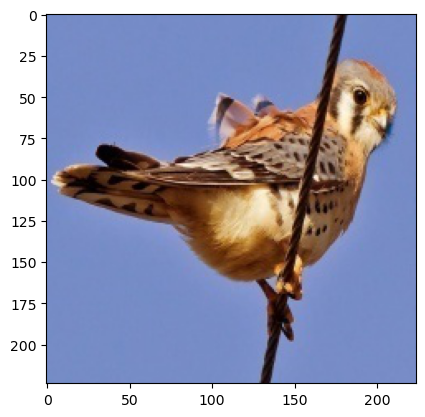

In [9]:
plt.imshow(img.permute(1,2, 0))  #by permuting the image dimension, we show the image. 
# img has a shape of 3,224,224
# to plot imshow, the first two will be height,width. 
#that's why i permuted the latter two indices to show the image

In [10]:
img_path = dataset.imgs[1000][0]
Im = Image.open(img_path)
Im.show()

In [11]:
#def show_photo(

In [12]:
batch_size = 128
train_data = DataLoader(dataset, shuffle = True, batch_size = batch_size)
valid_loader = DataLoader(valid_dataset, shuffle = True, batch_size = batch_size)

In [13]:
for batch in train_data:
    x, y = batch
    print(y)
    break

tensor([3, 7, 5, 8, 0, 1, 8, 0, 2, 8, 1, 5, 4, 6, 2, 9, 6, 6, 3, 8, 1, 7, 4, 6,
        1, 9, 0, 8, 7, 3, 3, 5, 1, 5, 6, 6, 4, 1, 3, 4, 4, 3, 2, 6, 4, 8, 2, 8,
        2, 9, 3, 4, 3, 4, 9, 7, 2, 8, 2, 7, 3, 4, 8, 3, 9, 1, 6, 4, 7, 4, 0, 2,
        8, 0, 1, 8, 4, 3, 2, 3, 1, 1, 0, 8, 4, 7, 1, 2, 7, 5, 4, 2, 4, 4, 2, 2,
        4, 8, 4, 4, 4, 7, 0, 7, 9, 6, 0, 1, 2, 4, 1, 0, 7, 3, 8, 6, 6, 1, 8, 6,
        0, 6, 5, 8, 8, 1, 9, 3])


In [14]:
dataset?

Type:        ImageFolder
String form:
Dataset ImageFolder
    Number of datapoints: 1504
    Root location: D:\birds/train
    StandardTransform
Transform: ToTensor()
Length:      1504
File:        d:\anaconda3\lib\site-packages\torchvision\datasets\folder.py
Docstring:  
A generic data loader where the images are arranged in this way by default: ::

    root/dog/xxx.png
    root/dog/xxy.png
    root/dog/[...]/xxz.png

    root/cat/123.png
    root/cat/nsdf3.png
    root/cat/[...]/asd932_.png

This class inherits from :class:`~torchvision.datasets.DatasetFolder` so
the same methods can be overridden to customize the dataset.

Args:
    root (string): Root directory path.
    transform (callable, optional): A function/transform that  takes in an PIL image
        and returns a transformed version. E.g, ``transforms.RandomCrop``
    target_transform (callable, optional): A function/transform that takes in the
        target and transforms it.
    loader (callable, optional): A function t

In [15]:
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)     # Generate predictions
        print(labels)
        print(out.shape)
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [16]:
class CNN(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 128, kernel_size = 5, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 5, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256,512, kernel_size = 7, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            nn.Linear(8192,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,100),
            nn.ReLU(),
            nn.Linear(100,10)
        )
    
    def forward(self, xb):
        return self.network(xb)

In [17]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    print(preds)
    print(labels)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def evaluate(model, val_loader):
    model.eval()
    with torch.no_grad():
        outputs = [model.validation_step(batch) for batch in val_loader]
        return model.validation_epoch_end(outputs)
    
    
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.Adam):
    
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

In [20]:
model = CNN()
history= fit(20,0.001,model,train_data,valid_loader)

tensor([3, 0, 5, 4, 3, 6, 7, 4, 3, 8, 1, 7, 6, 2, 3, 3, 4, 1, 5, 7, 6, 7, 9, 1,
        5, 5, 1, 4, 4, 7, 2, 2, 2, 5, 1, 2, 5, 1, 7, 5, 3, 8, 8, 6, 0, 1, 1, 0,
        9, 3, 0, 2, 3, 0, 1, 7, 0, 2, 9, 5, 4, 8, 1, 5, 5, 8, 6, 3, 2, 2, 8, 5,
        3, 4, 4, 7, 2, 2, 2, 7, 0, 2, 1, 4, 5, 1, 2, 3, 9, 9, 3, 4, 4, 1, 3, 9,
        3, 7, 4, 4, 7, 4, 7, 8, 6, 7, 7, 3, 1, 4, 5, 4, 9, 1, 3, 3, 8, 0, 7, 9,
        0, 4, 2, 6, 2, 1, 2, 4])
torch.Size([128, 10])
tensor([1, 3, 4, 6, 5, 8, 9, 3, 6, 9, 4, 1, 8, 9, 3, 8, 4, 4, 2, 2, 1, 9, 2, 3,
        7, 7, 8, 6, 7, 7, 7, 7, 6, 9, 2, 7, 1, 1, 9, 2, 2, 7, 3, 7, 4, 8, 6, 3,
        8, 8, 8, 9, 2, 1, 9, 7, 2, 6, 7, 0, 6, 1, 7, 8, 2, 7, 8, 2, 5, 6, 6, 2,
        9, 8, 3, 6, 2, 1, 9, 1, 7, 1, 7, 0, 4, 8, 2, 9, 0, 1, 9, 4, 2, 4, 7, 9,
        5, 2, 7, 8, 8, 8, 1, 8, 8, 0, 3, 3, 5, 0, 1, 2, 8, 2, 3, 5, 3, 2, 8, 5,
        5, 3, 7, 3, 3, 8, 3, 7])
torch.Size([128, 10])
tensor([3, 5, 7, 6, 1, 4, 2, 9, 0, 6, 0, 2, 7, 7, 5, 1, 2, 0, 3, 1, 5, 0, 7, 7,
        5,

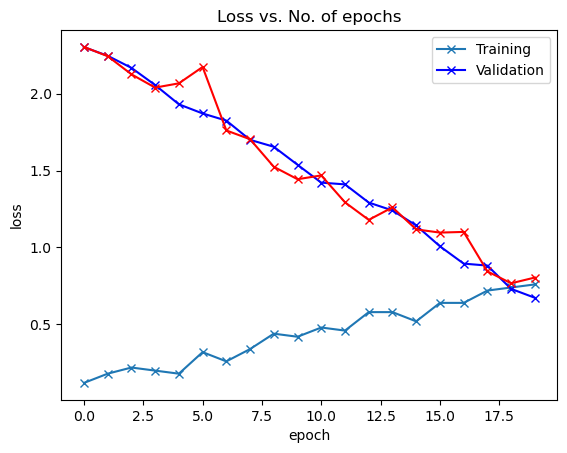

In [21]:
def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

plot_accuracies(history)

def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

In [24]:
torch.save(model.state_dict(), 'model.pth')

In [25]:
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [25]:
history2= fit(5,0.001,model,train_data,valid_loader)

tensor([2, 2, 2, 2, 4, 7, 1, 8, 1, 4, 2, 0, 9, 5, 2, 9, 5, 3, 5, 4, 0, 8, 1, 4,
        5, 6, 7, 6, 3, 8, 2, 8, 5, 5, 1, 0, 7, 1, 2, 4, 0, 3, 2, 6, 5, 8, 3, 2,
        4, 2, 3, 2, 3, 8, 4, 0, 5, 8, 5, 3, 0, 0, 0, 2, 3, 8, 2, 6, 2, 1, 4, 7,
        0, 3, 3, 5, 5, 9, 4, 6, 7, 3, 9, 4, 7, 8, 3, 7, 0, 7, 7, 5, 9, 5, 2, 8,
        7, 1, 9, 8, 6, 4, 1, 1, 7, 8, 7, 0, 7, 4, 2, 9, 4, 0, 5, 8, 4, 0, 3, 3,
        7, 9, 2, 4, 5, 2, 1, 3])
torch.Size([128, 10])
tensor([7, 2, 6, 8, 8, 0, 6, 8, 1, 8, 1, 9, 3, 1, 2, 8, 3, 6, 0, 9, 1, 3, 7, 8,
        7, 3, 7, 5, 1, 2, 3, 7, 9, 5, 0, 0, 6, 9, 1, 6, 0, 2, 1, 4, 3, 0, 9, 4,
        5, 1, 7, 2, 4, 5, 0, 9, 8, 2, 4, 5, 4, 9, 5, 7, 0, 0, 2, 2, 6, 1, 3, 1,
        3, 8, 4, 1, 8, 2, 1, 5, 1, 4, 7, 0, 7, 3, 5, 9, 9, 8, 2, 5, 4, 5, 3, 2,
        9, 7, 1, 6, 4, 9, 2, 5, 6, 2, 8, 7, 0, 5, 7, 2, 3, 8, 8, 9, 0, 3, 4, 9,
        8, 5, 6, 0, 1, 9, 8, 6])
torch.Size([128, 10])
tensor([3, 1, 7, 4, 9, 3, 2, 6, 4, 3, 9, 5, 7, 7, 5, 3, 4, 0, 4, 6, 2, 1, 3, 9,
        2,

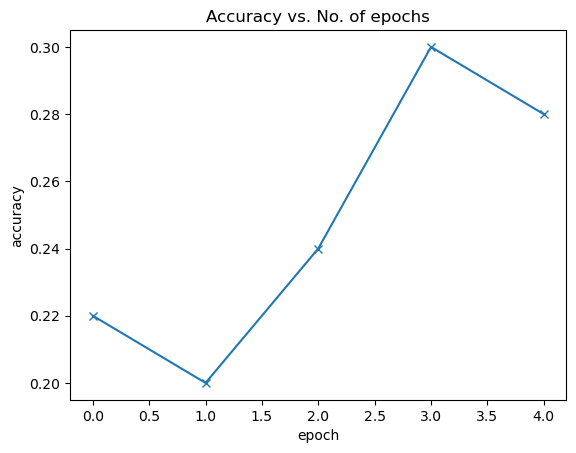

In [26]:
plot_accuracies(history2)